# Re-Entry Systems 
## [2] Gliding Entry

![Virgin](img/virgin.jpg)

As we saw in the *ballistic entry* notebook, the vehicle can experience severe decelerations that make this trajectory less suitable for human spaceflight, as well as large thermal loads. In addition, the lack of lift during the ballistic entry means there is little to no control over the location of the landing.

In order to minimise thermo-mechanical loads and allow manned flights, shallower entries at small $\gamma$ are desired. This can be achieved with some form of lift following a gliding trajectory, just like the Space Shuttle, or Virgin Gallactic's Spaceship Two.

**Equations of motion** 

Starting with the *lift* equation:

\begin{equation}
m V\frac{d\gamma}{dt} = L - mg \cos{\gamma}\left(1 - \frac{V^2}{g r}\right)
\end{equation}

we can introduce the equilibrium glide conditions by which $\gamma$ is small and $\frac{d\gamma}{dt} \simeq 0$ so that:

\begin{equation}
L = mg \left(1 - \frac{V^2}{g r}\right) = \frac{1}{2} \rho V^2 C_L S
\end{equation}

we can find a formula for the density, which is directly related to the altitude, as:

\begin{equation}
\rho(h) = 2 \frac{W / S}{C_L} \left(\frac{1}{V^2} - \frac{1}{V^2_c} \right)
\end{equation}

The local circular velocity $V_c$ depends on the distance to the centre of the Earth as:

\begin{equation}
V^2_c = g(R)R = g_0 \frac{R_E^2}{R^2} R = g_0 R_E \frac{R_E}{R} = V^2_{c0} \frac{R_E}{R_E + h} \simeq V^2_{c0}
\end{equation}

Given the large radius of the Earth and the height of the atmosphere, the local circular velocity remains approximately constant. This means that the equilibrium glide trajectory follows a formula of:


\begin{equation}
\rho \propto \frac{a}{V^2} - b
\end{equation}

The altitude-velocity profile that the vehicle will follow depends on the parameter $\frac{W}{S C_L}$ which represents the weight of the vehicle $W$, and its aerodynamic capacity to generate enough lift, given by $C_L S$, the lift coefficient $C_L$ and its surface $S$.

Knowing this, we can calculate the altitude-velocity profiles and investigate the influence of $\frac{W}{S C_L}$, the vehicle characteristics. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rc('font', family='serif')
plt.rc('text', usetex=False)

# Parameters
g = 9.81                   # gravity [m / s^2]
rho0 = 1.225               # density at sea level [kg / m^3]
beta = 1 / 7050            # atmosphere height scale factor [1 / m]
R_earth = 6371 * 1000      # Earth radius [m]
vc0_sq = g * R_earth       # circular velocity [m / s]

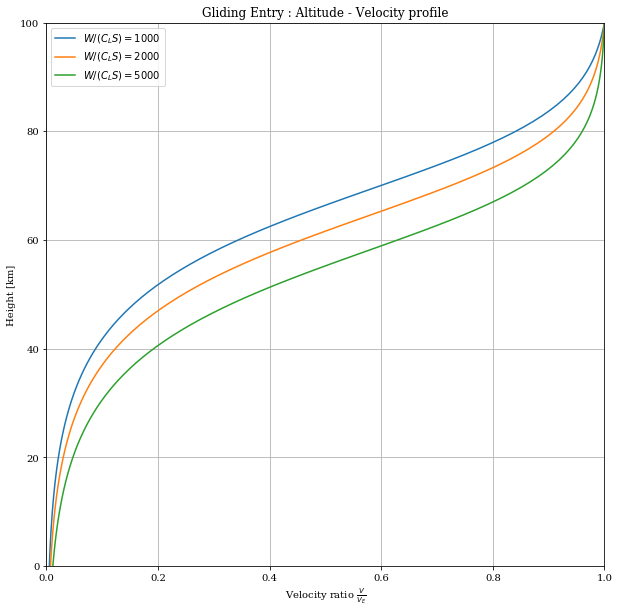

In [2]:
# We look at a height profile from 100 km to sea-level
h = 1e3 * np.linspace(100, 0, 100)

# (1) First we calculate the density profile using the standard exponential atmospher
rho = rho0 * np.exp(-beta * h)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for w in [1000, 2000, 5000]:
    # for each value of the weight / lift ratio
    WS = w    # N / m^2
    v = np.sqrt((1 / (rho / (2 * WS) + 1 / vc0_sq)))
    v_ratio = v / np.max(v)
    
    ax.plot(v_ratio, h / 1000, label=r'$W / (C_L S) = %d$' % w)

ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
ax.legend()
ax.grid(True)
ax.set_xlabel(r'Velocity ratio $\frac{V}{V_E}$')
ax.set_ylabel(r'Height [km]')
ax.set_title(r'Gliding Entry : Altitude - Velocity profile')
plt.show()

Looking at the altitude-velocity profile, we can see that heavier vehicles or with poorer aerodynamic performance (larger $W / (C_L S)$ ratio) are forced to glide faster for all altitudes.

We can also calculate the minimum velocity at which the vehicle reaches the ground:

\begin{equation}
V_{min} = V_{c0} \sqrt{\frac{W / (C_L S)}{\frac{1}{2} \rho_0 V_{c0}^2 + W / (C_L S)}}
\end{equation}

This can be useful for calculating how much lift the vehicle needs to generate to touch down below a maximum speed, for a fixed weight. Or it can be used to estimate the length of the runway needed to decelerate completely.

In [3]:
WS = [1000, 5000, 10000]
print("Minimum Velocity:")
for W in WS:
    v_min = np.sqrt(vc0_sq * W / (0.5 * rho0 * vc0_sq + W)) 
    v_kmh = v_min * 3.6
    print("W / (CL S): %d N / m^2 | v_min = %.1f m/s or %.1f km / h" % (W, v_min, v_kmh))


Minimum Velocity:
W / (CL S): 1000 N / m^2 | v_min = 40.4 m/s or 145.5 km / h
W / (CL S): 5000 N / m^2 | v_min = 90.3 m/s or 325.2 km / h
W / (CL S): 10000 N / m^2 | v_min = 127.8 m/s or 459.9 km / h


## Gliding Entry : Equilibrium flight angle


\begin{equation}
\frac{dr}{dt} = \frac{dh}{dt} = V \sin{\gamma}
\end{equation}

to eliminate the time dependency, we can define the flight range $s$ for which $V=ds / dt$, so that

\begin{equation}
\frac{dh}{ds} \frac{ds}{dt} = V \sin{\gamma} 
\end{equation}

\begin{equation}
\frac{dh}{ds} = \sin{\gamma} 
\end{equation}

We also know from the exponential atmosphere model that the density is given by:

\begin{equation}
\rho = \rho_0 \exp{(-\beta h)}
\end{equation}

which we can differentiate to obtain:

\begin{equation}
d\rho = -\beta \rho dh
\end{equation}

or 

\begin{equation}
dh = -\frac{d\rho}{\beta \rho}
\end{equation}

substituting the height differential back into the previous equation:

\begin{equation}
\sin{\gamma} = -\frac{d\rho}{ \beta \rho ds} = -\frac{1}{ \beta \rho} \frac{d\rho}{dV}\frac{dV}{ds}
\end{equation}

so we need expressions for $\frac{d\rho}{dV}$ and $\frac{dV}{ds}$. The first one we can obtain from the formula that links $\rho(h)$ to $V$ in the previous equation:

\begin{equation}
\frac{d\rho}{dV} = -4\frac{W}{S C_L V^3}
\end{equation}

Recalling the *drag* equation:

\begin{equation}
m \frac{dV}{dt} = -D - mg \sin{\gamma}
\end{equation}

and simplifying for small angles $\gamma$, we can obtain:

\begin{equation}
\frac{dV}{dt} = \frac{dV}{ds} \frac{ds}{dt}= V \frac{dV}{ds} = - D / m = -\frac{D}{L} g \frac{L}{mg}
\end{equation}

recalling the previous equation:

\begin{equation}
\frac{L}{mg} = \left(1 - \frac{V^2}{V_c^2} \right)
\end{equation}

we find that:

\begin{equation}
\frac{dV}{ds} = - \frac{\frac{D}{L}g  \left(1 - \frac{V^2}{V_c^2} \right)}{V}
\end{equation}

and joining everything together we obtain an estimate for the flight angle $\gamma$:

\begin{equation}
\gamma \simeq \sin{\gamma} = -\frac{1}{\beta} \frac{2}{L/D} \frac{g}{V^2}
\end{equation}

This indicates that the gliding angle will be small is the vehicle has good aerodynamic characteristics ($L/D$) and if the velocity remains high enough to generate enough lift. It also depends indirectly on the characteristics of the atmosphere via $\beta$. Denser atmospheres at high altitude (large $\beta$) allow better gliding performance.

Re-writing the equation based on the fact that $V_c \simeq \sqrt{g R_E}$ we find that:

\begin{equation}
\gamma \simeq \sin{\gamma} = -\frac{1}{\beta R_E} \frac{2}{L/D} \frac{V_c^2}{V^2}
\end{equation}

We can use this equation to calculate the equilibrium flight path angle throughout the trajectory, as a function of the vehicle's aerodynamic characteristics.

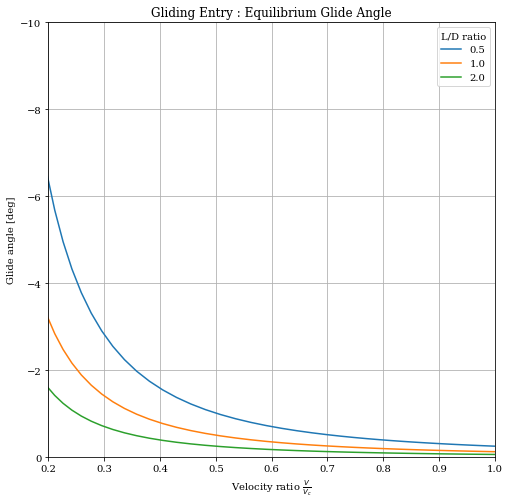

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
LD = [0.5, 1.0, 2.0]
for l in LD: 
    gamma = (-2 / (beta * R_earth * l) / v_ratio**2)
    ax.plot(v_ratio, np.rad2deg(gamma), label='%.1f' % l)

ax.legend(loc=1, title='L/D ratio')
ax.set_xlabel(r'Velocity ratio $\frac{V}{V_c}$')
ax.set_ylabel(r'Glide angle [deg]')
ax.set_xlim([0.2, 1])
ax.set_ylim([0, -10])
ax.grid(True)
ax.set_title(r'Gliding Entry : Equilibrium Glide Angle')
plt.show()

## Gliding Entry : Flight Range

Flight range is an important parameter because the vehicle needs to have the capacity to reach the landing site, and in case of emergency, alhead towards ternative landing sites. In this case, we will skip the derivating, but it will suffice that say that the formula for the range $R_f$ relative to the radius of the Earth is given by:

\begin{equation}
\frac{R_f}{R_E} = -\frac{1}{2}\frac{L}{D}\ln{\left(1 - \frac{V_E^2}{V_C^2}\right)}
\end{equation}

where $V_E$ represents the entry velocity and $V_C$ is the local circular velocity. This range represents the chord along Earth's circumference, such that in order for the vehicle to complete one revolution, $\frac{R_f}{R_E}$ must be $2\pi$.

In the code cell below we calculate the range for several cases of lift / drag ratio, as a function of the entry velocity ratio. As the entry velocity gets closer to the local circular velocity, the range increases up to the singularity at $\frac{V_E}{V_c}=1$, which represents the vehicle orbiting the Earth rather than gliding back. Aside from that, we can see that increasing the aerodynamic characteristics of the vehicle has a significant impact on the range. For instance, a vehicle with $L/D=4$ entrying the atmosphere with a velocity around 90% of the local circular velocity would reach the other side of the Earth after gliding.

Being able to estimate the maximum flight range is important as this allow us to decide the location of the re-entry needed to reach a specific landing site.

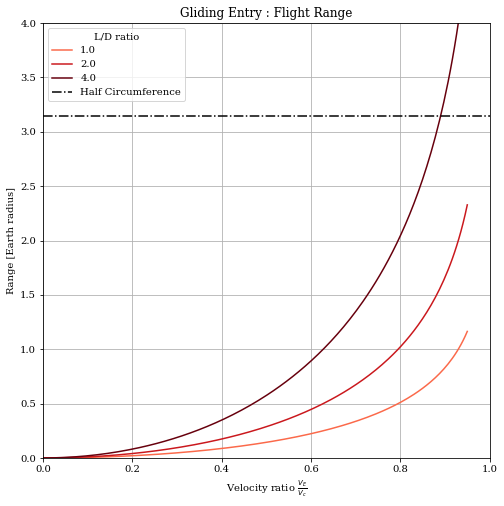

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
LD = [1.0, 2.0, 4.0]
colors = cm.Reds(np.linspace(0.5, 1, len(LD)))

ve_ratio = np.linspace(0, 0.95, 200)
for i, l in enumerate(LD): 
    R_ratio = -0.5 * l * np.log(1 - ve_ratio**2)
    ax.plot(ve_ratio, R_ratio, label='%.1f' % l, color=colors[i])
    
ax.axhline(y=np.pi, linestyle='-.', color='k', label='Half Circumference')
ax.legend(loc=2, title='L/D ratio')
ax.set_xlabel(r'Velocity ratio $\frac{V_E}{V_c}$')
ax.set_ylabel(r'Range [Earth radius]')
ax.set_xlim([0, 1])
ax.set_ylim([0, 4])
ax.grid(True)
ax.set_title(r'Gliding Entry : Flight Range')
plt.show()

## Gliding Entry : Mechanical loads

Just like we did for the ballistic entry, it is possible to calculate the deceleration load during a gliding entry. Starting from the *drag* equation:

\begin{equation}
\frac{a}{g} = -\frac{D}{mg} - \sin{\gamma}
\end{equation}

recalling the glide condition equation and the flight path angle equation:

\begin{equation}
\frac{L}{mg} = \left(1 - \frac{V^2}{V_c^2} \right)
\end{equation}

\begin{equation}
\gamma \simeq \sin{\gamma} = -\frac{1}{\beta R_E} \frac{2}{L/D} \frac{V_c^2}{V^2}
\end{equation}
we can write the *deceleration* as:

\begin{equation}
\frac{\overline{a}}{g} = \frac{D}{L} \left(1 - \frac{V^2}{V_c^2} - \frac{2}{\beta R_E}\frac{V_c^2}{V^2}  \right)
\end{equation}

calculating the *maximum* deceleration with:

\begin{equation}
\frac{d \overline{a}}{d(V/V_c)} = 0
\end{equation}

we find that:

\begin{equation}
\frac{V'}{V_c} = \left(\frac{2}{\beta R_E} \right)^{1/4} = 0.218
\end{equation}

which implies that the *maximum* deceleration occurs quite late along the trajectory, compared to the 0.606 for a ballistic re-entry. We can use this new formula to calculate the value for the *maximum* deceleration as:

\begin{equation}
\frac{\overline{a}_{max}}{g} = \frac{D}{L} \left(1 - 2\sqrt{\frac{2}{\beta R_E}}  \right) \simeq 0.905 \frac{D}{L}
\end{equation}

One can see that the *maximum* deceleration in the case of a gliding entry are significantly smaller than those of a ballistic entry. For instance, assuming a lift / drag ratio of 2, the vehicle would only suffer a *maximum* deceleration of around $0.45 g$.

Depending on the lift parameter $W / (C_L S)$, the exact altitude at which this deceleration happens varies between 40 to 50 km.

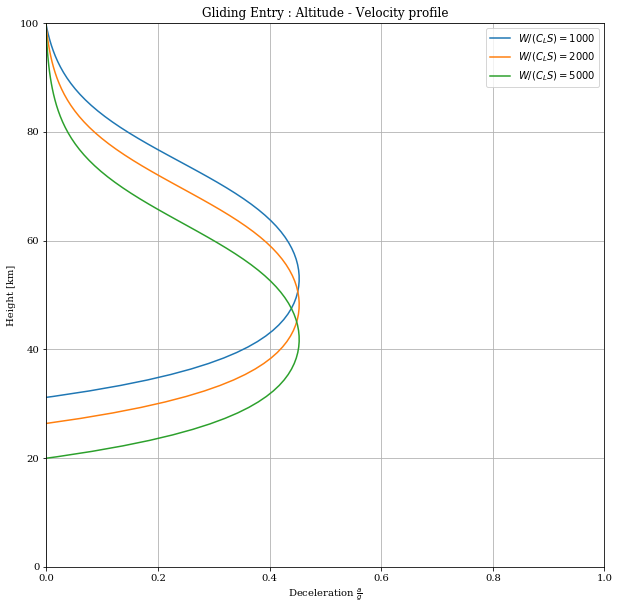

In [6]:
# We look at a height profile from 100 km to sea-level
h = 1e3 * np.linspace(100, 0, 100)

# (1) First we calculate the density profile using the standard exponential atmospher
rho = rho0 * np.exp(-beta * h)
LD = 2

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for w in [1000, 2000, 5000]:
    # for each value of the weight / lift ratio
    WS = w    # N / m^2
    v = np.sqrt((1 / (rho / (2 * WS) + 1 / vc0_sq)))
    v_ratio = v / np.max(v)
    
    a_ratio = 1/LD * (1 - v_ratio**2 - 2/(beta*R_earth * v_ratio**2))
    
    ax.plot(a_ratio, h / 1000, label=r'$W / (C_L S) = %d$' % w)

ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
ax.legend()
ax.grid(True)
ax.set_xlabel(r'Deceleration $\frac{a}{g}$')
ax.set_ylabel(r'Height [km]')
ax.set_title(r'Gliding Entry : Altitude - Velocity profile')
plt.show()

## Gliding Entry : Thermal loads

A similar calculation can be done for the heat flux at the stagnation point of the vehicle (the equivalent calculation was already done for the ballistic entry case). The derivation is tedious, so we will skip it here, but the final formula for the point at which the heat flux is **maximum** is given by:

\begin{equation}
\frac{V''}{V_c} = \sqrt{\frac{1 + 2n}{3}} = 0.816
\end{equation}

where $n=0.5$ for a laminar boundary layer and $n=0.2$ for a turbulent boundary layer.

Once again, just like in the case of a ballistic entry, the **maximum** thermal load takes place at a higher altitude than the *maximum* deceleration. In the case of a gliding entry the separation between these two altitudes is even larger. This is a good thing, because the aero-heating can temporarily weaken the structure of the vehicle, so we want the *maximum* mechanical load to happen after the vehicle has had enough time to cool down to a reasonable temperature.

## Gliding Entry : Entry Corridor

The **entry corridor** is defined as the enclosure of all entry trajectories that fulfill the design constraints. It shows us all the possible flight paths that can lead to a safe return, and it highlights which constraints are the most relevant at the different stages of the trajectory. In this section, we will calculate an example entry corridor for a gliding vehicle.

The first constraint we need to account for is the *equilibrium glide* condition, which defines the ceiling trajectory above which the vehicle cannot travel, given its aerodynamic characteristics. Using the formula for the density:

\begin{equation}
\rho_{eq} = 2 \frac{W / S}{C_L} \left(\frac{1}{V^2} - \frac{1}{V^2_c} \right)
\end{equation}

and the exponential atmosphere $\rho(h) = \rho_0 \exp{(-\beta h)}$, we can identify the height profile for an equilibrium glide $h_{eq}(V)$.

With regards, to the **thermal load**, recalling the Chapman equation we can write the heat flux as:

\begin{equation}
q = c^* \frac{1}{R_N^n} \left( \frac{\rho}{\rho_0} \right)^{1 - n}  \left( \frac{V}{V_c} \right)^m
\end{equation}

with $c^*=1.1097\cdot10^8 \sqrt{m}$, $\rho_0=1.225 kg/m^3$, $n=0.5$ for laminar boundary layer, and $m=3$ for Earth's atmosphere. Assuming there is a maximum heat flux $q_{max}$ allowed by the design of the vehicle, we can calculate the altitude-velocity profile that defines such boundary as:

\begin{equation}
\rho_{q} = \rho_0 \left[R_N^n \frac{q_{max}}{c^*} \left( \frac{V}{V_c} \right)^m \right]^{n-1}
\end{equation}

and identify the height profile $h_{q}$ that represents the **maximum** heat load condition.

Finally, if the vehicle has a limitation in terms of the deceleration it can withstand, that can also be used to define a boundary for the entry corridor. Defining the mechanical load as the ratio between the *total* aerodynamic force and the weight, also known as the *g-load*:

\begin{equation}
n_{g,max} = \frac{\sqrt{D^2 + L^2}}{m g}
\end{equation}

using the formula for the aerodynamic forces based on the dynamic pressure $\frac{1}{2}\rho V^2 C_L S$, we can find the density profile for a given *g-load*:

\begin{equation}
\rho_{g} = 2 n_{g,max} \frac{ C_L W/(S C_L) }{V^2\sqrt{C_D^2 + C_L^2}}
\end{equation}

and once again identify the height profile $h_{g}$ that represents the *maximum* deceleration condition.
The code cell below, shows an example entry corridor that accounts for these 3 constraints. We have introduced substantial simplifications; for instance, we have assumed constant aerodynamic coefficients $C_L$ and $C_D$ when, in reality, they depend on the angle of attack $\alpha$ (which may vary during the descent), as well as the Mach number $M$, which depends on the local density and thus on the altitude. But for the purposes of this example, we are not aiming for complete accuracy.


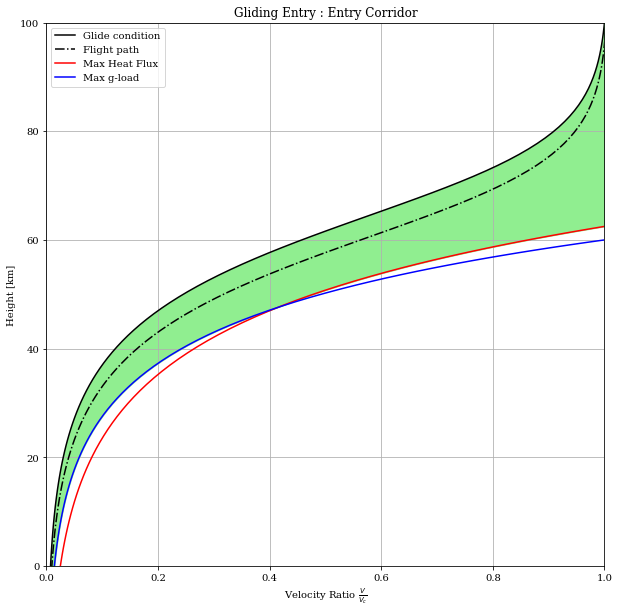

In [84]:
# Design parameters
WS = 2000        # [N / m^2] Lift parameter Glide Condition 
# Maximum Heat Flux condition
n = 0.2          # boundary layer exponent (turbulent)
m = 3            # atmospheric velocity exponent
c = 1.1097e8     # Chapman equation coefficient
qmax = 8000e9    # [W / m^2] Maximum acceptable heat flux
RN = 0.6         # m
# Maximum Deceleration condition
ngmax = 3.5      # [g] Maximum acceptable load
CL = 2           # Lift coefficient
CD = 1           # Drag coefficient
Vc = 7.9e3       # Local circular velocity 7.9 [km/s]

# We look at a height profile from 100 km to sea-level
hmax = 100
h = 1e3 * np.linspace(hmax, 0, 100)

# (1) First we calculate the density profile using the standard exponential atmospher
rho = rho0 * np.exp(-beta * h)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Equilibrium Glide Condition
v = np.sqrt((1 / (rho / (2 * WS) + 1 / vc0_sq)))
v_ratio = v / np.max(v)

# Actual Flight path
W_path = 3500
v_path = np.sqrt((1 / (rho / (2 * W_path) + 1 / vc0_sq)))
v_path /= np.max(v)

# Maximum Heat Flux boundary
rho_q = (RN**n * qmax/c * v_ratio**m)**(n-1)
h_q = -np.log(rho_q) / beta

# Max Deceleration Load boundary
rho_g = 2 * ngmax * CL * WS / ((v_ratio * Vc)**2 * np.sqrt(CL**2 + CD**2))
h_g = -np.log(rho_g) / beta

ax.plot(v_ratio, h / 1000, color='k', label='Glide condition')
ax.plot(v_path, h / 1000, color='k',  label='Flight path', linestyle='-.')
ax.plot(v_ratio, h_q / 1000, color='red', label='Max Heat Flux')
ax.plot(v_ratio, h_g / 1000, color='blue', label='Max g-load')

# plot the possible entry corridor
min_boundary = [max(x, y) for (x, y) in zip(h_q / 1000, h_g / 1000)]
ax.fill_between(v_ratio, min_boundary, h/1000, color='lightgreen')

ax.set_xlim([0, 1])
ax.set_ylim([0, hmax])
ax.legend()
ax.grid(True)
ax.set_xlabel(r'Velocity Ratio $\frac{V}{V_c}$')
ax.set_ylabel(r'Height [km]')
ax.set_title(r'Gliding Entry : Entry Corridor')
plt.show()

The figure above shows the entry corridor for a gliding vehicle given a set of design constraints such as its aerodynamic characteristics, and maximum thermo-mechanical loads. The equilibrium glide conditions marks the altitude-velocity profile above which the vehical can't fly. All acceptable flight paths must travel faster and at lower altitudes to be able to generate enough lift.

We can also see that, at the early stages of the flight, the dominating constraint is that of **maximum** heat flux. That's why vehicles like the Space Shuttle enter the atmosphere at large angle of attack $\alpha$, exposing a larger area to minimise heat loads, and then shift towards a gliding path at lower angle of attack to reduce mechanical loads. At the later stages of the flight (lower altitude), where the density is higher, the dominating constraint is that of *maximum* deceleration from aerodynamic forces.